In [1]:
import sklearn.datasets as datasets
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# EDA

In [4]:
type(iris.data)

numpy.ndarray

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [8]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [9]:
df.shape

(150, 4)

In [10]:
df.count()

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
dtype: int64

In [11]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Detecting Outliers datas

In [12]:
import seaborn as sns

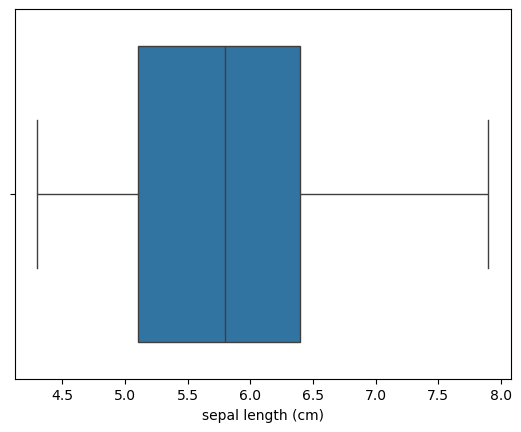

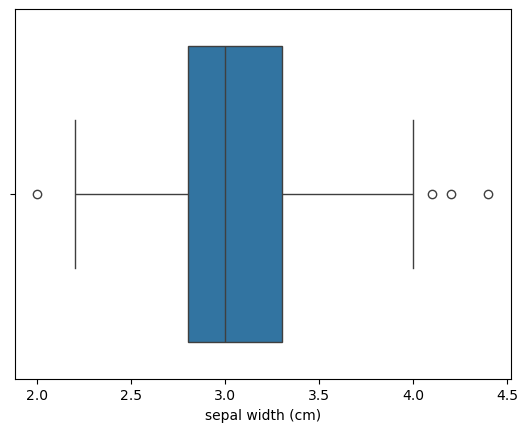

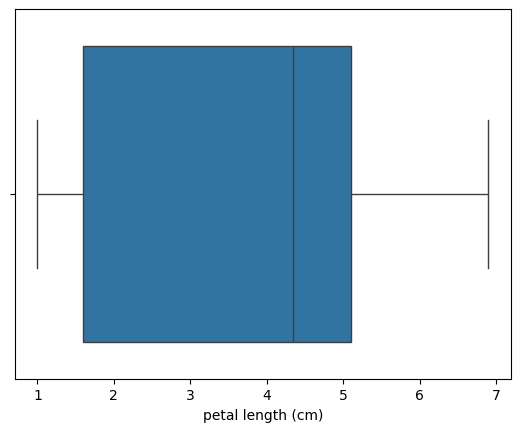

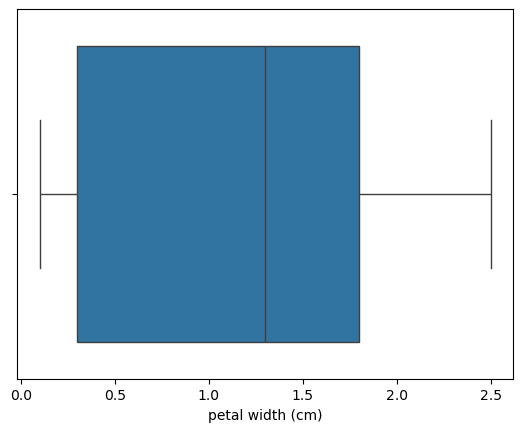

In [13]:
for col in range(4):
    plt.figure()
    sns.boxplot(x=df.iloc[:, col])
    plt.show()

In [14]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q1 - Q3
IQR

sepal length (cm)   -1.3
sepal width (cm)    -0.5
petal length (cm)   -3.5
petal width (cm)    -1.5
dtype: float64

In [15]:
# Histogram

In [16]:
def scatterplot(x, y, xlable, ylabel):
    _, ax = plt.subplots()
    scatter = ax.scatter(iris.data[:, x], iris.data[:, y], c=iris.target)
    ax.set(xlabel=xlable, ylabel=ylabel)
    _ = ax.legend(
            scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
    )

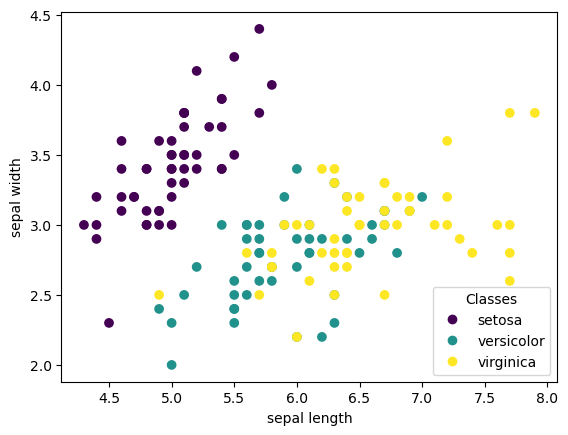

In [17]:
scatterplot(0, 1, 'sepal length', 'sepal width')

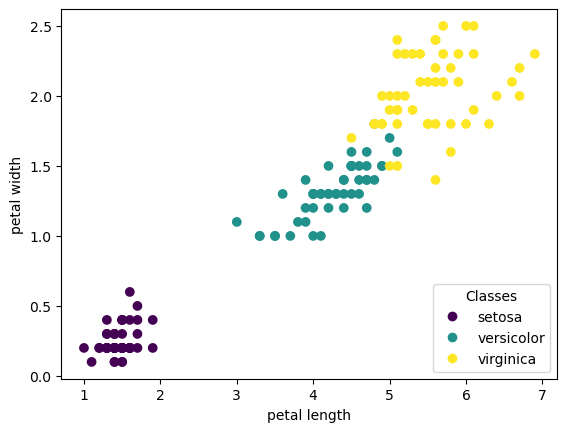

In [18]:
scatterplot(2, 3, 'petal length', 'petal width')

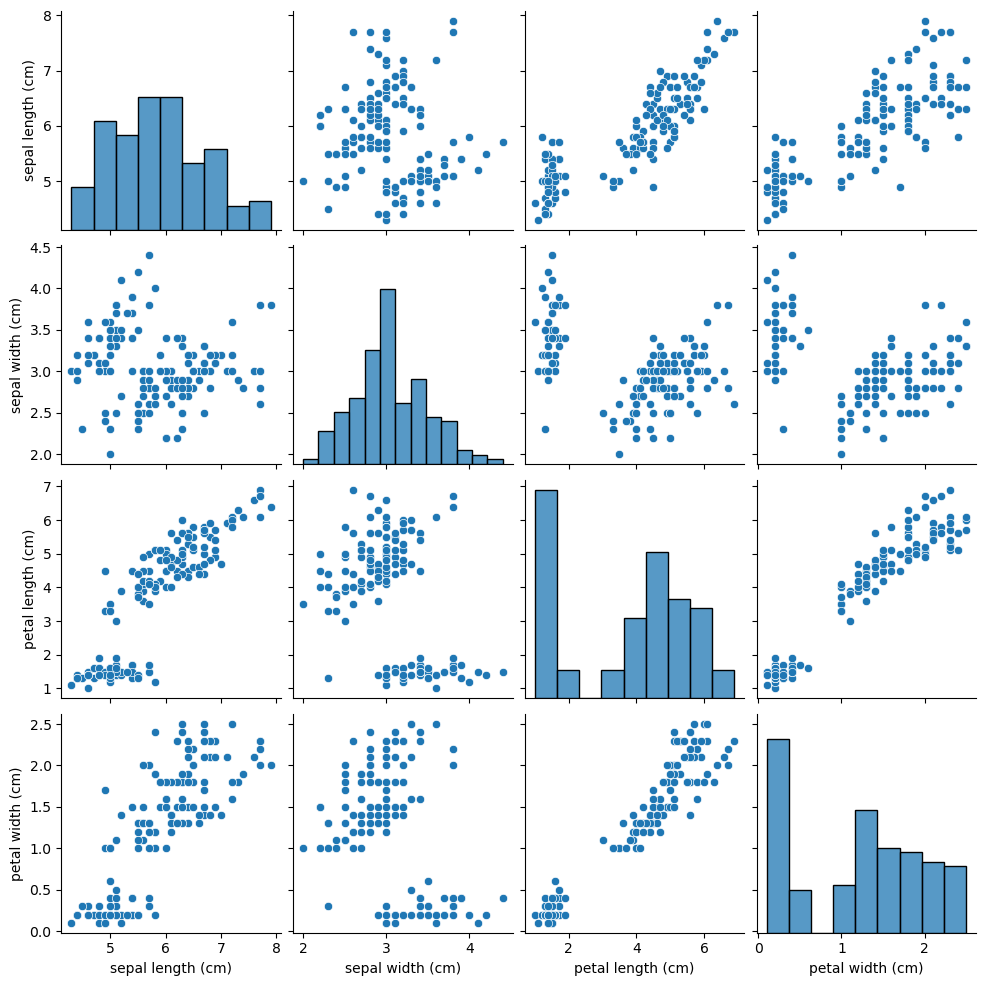

In [19]:
sns.pairplot(df)

Modling (DecisionTree)

In [20]:
from sklearn import tree 

In [28]:
y = iris.target
dtree = tree.DecisionTreeClassifier()
dtree.fit(df, y)

DecisionTreeClassifier()

In [32]:
prediction_data = pd.DataFrame([
    [1.1, 1.8, 1.2, 0.2],
    [8.1, 2.1, 2.5, 2.9]
], columns=iris.feature_names)

prediction_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,1.1,1.8,1.2,0.2
1,8.1,2.1,2.5,2.9


Modling (K-Nearest)

In [33]:
df['class'] = iris.target
df['class name'] = iris.target_names[iris['target']]

In [34]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,class name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [36]:
x_train, x_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=0
)

In [37]:
kn = KNeighborsClassifier(n_neighbors=10)
kn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [38]:
kn.score(x_test, y_test)

1.0

In [39]:
kn.predict([
    [1.1, 1.8, 1.2, 0.2],
    [8.1, 2.1, 2.5, 2.9]
])

array([0, 1])

In [40]:
kn.predict([[5.6, 4.4, 1.2, 0.4]])

array([0])

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [43]:
lr.predict([
    [1.1, 1.8, 1.2, 0.2],
    [8.1, 2.1, 2.5, 2.9]
])

array([0.3700728 , 1.56217743])

In [44]:
lr.score(x_test, y_test)

0.9055032992676105